## Embedding Projection for Organisms(T-SNE, PCA, Umap)
+ In this notebook we use different projection for the last layer prior to the softmax layer in the CNN-

## 1. Importing Libraries

In [2]:
import os
import sys
module_path = "../src"
#os.environ["WANDB_SILENT"] = "true" # Environment Variable to make wandb silent
if module_path not in sys.path:
    sys.path.append(module_path)
# 1. General Libraries
import pandas as pd
import numpy as np
from pathlib import Path
import yaml
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
# 2. DataModule & Class Libraries
from utils.label_encoder import label_encoder_target
from utils.calc_stat import calc_dataset_mean_std
from utils.FeatureExtractor import get_vector_representation,prepare_projection
from dataset.ImageDataModule import ImageDataModule
from dataset.ImageDataset import ImageDataset
from models.EfficientNetClass import EfficientNetClass
from models.ResNetClass import ResNetClass
# 3. Pytorch & Pytorch Lightning Libraries
from pytorch_lightning import Trainer,seed_everything
from pytorch_lightning.callbacks import LearningRateMonitor
from pytorch_lightning.callbacks.early_stopping import EarlyStopping
from pytorch_lightning.loggers import WandbLogger
import torch
# 4. Wandb Tracker Experiements
import wandb

In [3]:
DATA_PATH = '../data/organism_modality.csv'
BASE_PATH = Path('/mnt')
BASE_IMG_DIR = BASE_PATH / 'subfigure-classification'
SEED = 42
model_path = '/mnt/artifacts/models/Organisms/organisms_v1.pt'

In [4]:
df = pd.read_csv(DATA_PATH, sep='\t')
le_encoder,dict_label = label_encoder_target(df,target_col='higher_modality')
df.head()

,img,modality,set,source,img_path,higher_modality,caption,split_set
0,12178_2008_9027_Fig4_HTML-1.jpg,x-rays,TRAIN,clef16,2016/train/DRXR/12178_2008_9027_Fig4_HTML-1.jpg,ORGANISMS,( a ) This anteroposterior radiograph demonstr...,TRAIN
1,12178_2008_9027_Fig4_HTML-2.jpg,x-rays,TRAIN,clef16,2016/train/DRXR/12178_2008_9027_Fig4_HTML-2.jpg,ORGANISMS,( a ) This anteroposterior radiograph demonstr...,VAL
2,12178_2008_9027_Fig4_HTML-3.jpg,x-rays,TRAIN,clef16,2016/train/DRXR/12178_2008_9027_Fig4_HTML-3.jpg,ORGANISMS,( a ) This anteroposterior radiograph demonstr...,TRAIN
3,12178_2009_9056_Fig9_HTML-1.jpg,other,TRAIN,clef16,2016/train/DRUS/12178_2009_9056_Fig9_HTML-1.jpg,ORGANISMS,CTS patient #4. Longitudinal view of the media...,VAL
4,12178_2009_9056_Fig9_HTML-2.jpg,other,TRAIN,clef16,2016/train/DRUS/12178_2009_9056_Fig9_HTML-2.jpg,ORGANISMS,CTS patient #4. Longitudinal view of the media...,TRAIN


In [5]:
# 3.1 Load the Resnet Model
model = ResNetClass.load_from_checkpoint(model_path)
print('*'*5,' Resnet Model Parameters ','*'*5)
print(model.hparams)
print('*'*5,' Resnet Model Children ','*'*5)
children_counter = 0
for n,c in model.named_children():
    print("Children Counter: ",children_counter," Layer Name: ",n,)
    children_counter+=1

*****  Resnet Model Parameters  *****
"class_weights":   [0.91058122 0.81575434 2.33206107 0.80183727]
"fine_tuned_from": whole
"lr":              1e-05
"mean_dataset":    [0.3698757  0.36533177 0.3616447 ]
"metric_monitor":  val_avg_loss
"mode_scheduler":  min
"name":            resnet152
"num_classes":     4
"pretrained":      True
"std_dataset":     [0.29352856 0.28809318 0.28843877]
*****  Resnet Model Children  *****
Children Counter:  0  Layer Name:  model


In [6]:
prepare_projection(model ,le_encoder,DATA_PATH,BASE_IMG_DIR,SEED,CLASSF ='organisms' ,VERSION = 1)

Feature Vector for training: 



Feature Vector for Validation: 



Feature Vector for Test: 



***** PCA *****
***** UMAP *****


In [7]:
df_projection = pd.read_parquet( '/mnt/artifacts/projections/organisms_v1.parquet')

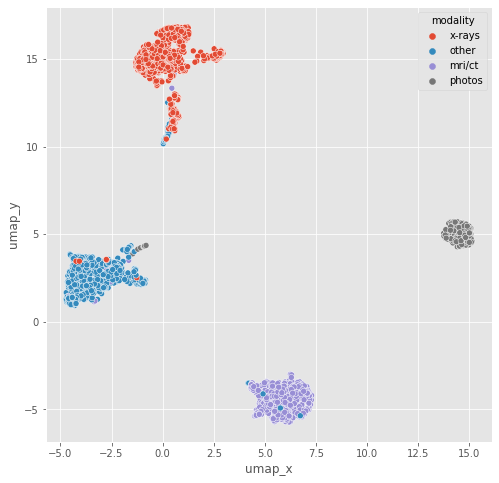

In [9]:
plt.figure(figsize=(8,8))
df1 = df_projection[df_projection['split_set']=='TRAIN'].reset_index(drop = True)
sns.scatterplot(data=df1, x="umap_x", y="umap_y", hue="modality")
plt.show()

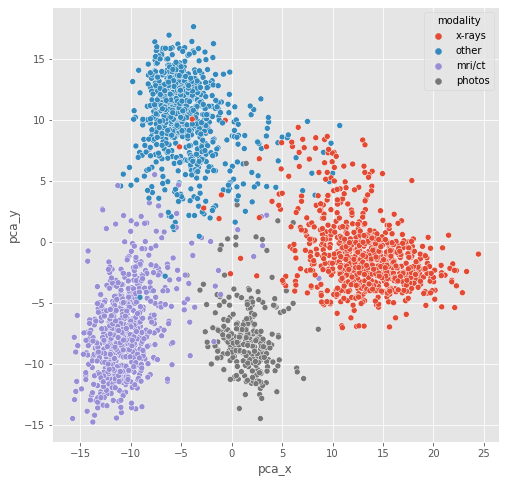

In [11]:
plt.figure(figsize=(8,8))
df1 = df_projection[df_projection['split_set']=='TRAIN'].reset_index(drop = True)
sns.scatterplot(data=df1, x="pca_x", y="pca_y", hue="modality")
plt.show()